# Econometrics

## Second Session

### We will complete the homework from the previous session and use a different library to perform the same regression analysis. Additionally, we will explore various methods and tools for plotting data in Python.

In [257]:
import pandas as pd

In [259]:
file_name = "first session.xlsx"
sheetname = "HW"

data = pd.read_excel(file_name, sheet_name = sheetname)
data.head()

,First,Second
0,1.5,2.85
1,2.0,3.60
2,2.5,4.15
3,3.0,5.00
4,3.5,5.85


In [261]:
data['First'].var()

32.5

In [265]:
X = data['First']
Y = data['Second']

In [269]:
data.head()

,First,Second
0,1.5,2.85
1,2.0,3.60
2,2.5,4.15
3,3.0,5.00
4,3.5,5.85


In [277]:
X.tail()

34    18.5
35    19.0
36    19.5
37    20.0
38    20.5
Name: First, dtype: float64

## cov(x,y)

In [279]:
cov_x_y = Y.cov(X)

In [281]:
print(cov_x_y)

50.94210526315789


## var(x)

In [283]:
variance_x = X.var()
beta_1 = cov_x_y / variance_x

## $ \beta_1$

In [285]:
beta_1

1.5674493927125506

## print function capablities

In [301]:
print("This is covariance: ", cov_x_y)
print("this is variance: ", variance_x)
print("slope:", beta_1)

This is covariance:  50.94210526315789
this is variance:  32.5
slope: 1.5674493927125506


## We must use the print() function to include descriptions for our code. If we choose not to do so, Python may interpret them as something else.

In [473]:
"slope", beta_1

('slope', 1.5674493927125506)

In [308]:
type("slope", beta_1)

TypeError: type() takes 1 or 3 arguments

## $ f(x) = x^2 $
## $ f(2) = 2^2 $
## $ f(2, 3) = ??? $

In [311]:
combination = "slope", beta_1

In [313]:
combination

('slope', 1.5674493927125506)

## tuple

In [315]:
type(combination)

tuple

## $\bar X$
## $\bar Y$

In [317]:
mean_Y = Y.mean()
mean_X = X.mean()

print("the average of Y is: ", mean_Y)
print("the average of X is: ", mean_X)

the average of Y is:  17.492307692307694
the average of X is:  11.0


## $\beta_0$

In [319]:
beta_0 = mean_Y - beta_1 * mean_X
print("the intercept is: ", beta_0)

the intercept is:  0.2503643724696367


## $ SST = \sum (Y - \bar Y)^2 $

In [323]:
SST = ((Y - mean_Y)**2).sum()
print("sum squared total: ", SST)

sum squared total:  3034.537692307693


In [427]:
y_hat = beta_0 + beta_1 * X
y_hat.head()

,const,First
0,1.817814,2.601538
1,1.817814,3.385263
2,1.817814,4.168988
3,1.817814,4.952713
4,1.817814,5.736437


## SSE

In [330]:
SSE = ((Y - y_hat) ** 2).sum()
SSE

0.2691578947368405

In [332]:
R_squared = 1 - SSE / SST

In [334]:
R_squared

0.9999113018449501

# plotting in Python

## matplotlib library

In [ ]:
# pip install matplotlib

In [340]:
import matplotlib.pyplot

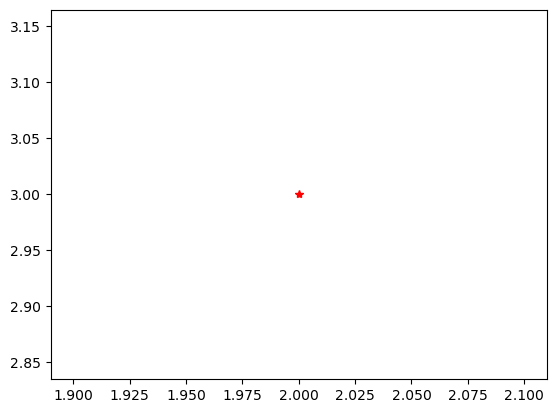

In [346]:
matplotlib.pyplot.plot(2, 3, color = 'red', marker = '*')
matplotlib.pyplot.show()

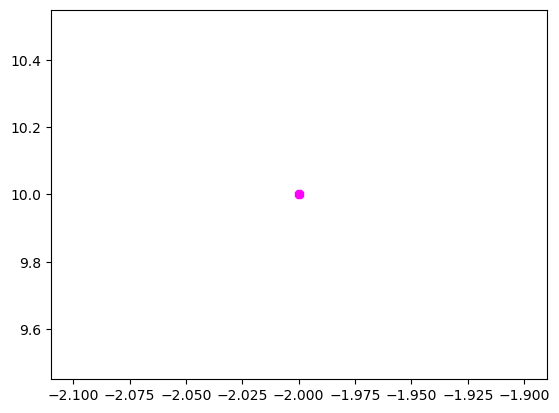

In [352]:
x = -2
y = 10

matplotlib.pyplot.plot(x, y, color = 'magenta', marker = '8')
matplotlib.pyplot.show()

## using alias

In [354]:
import matplotlib.pyplot as plt

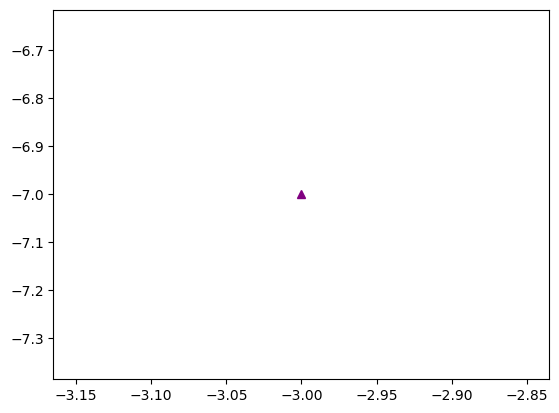

In [356]:
x = -3
y = -7

plt.plot(x, y, marker = '^', color = "purple")
plt.show()

## scatter plot

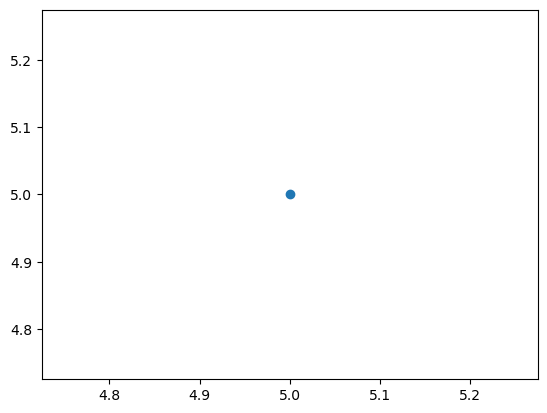

In [361]:
a = 5
b = 5

plt.scatter(a, b)
plt.show()

# Scatter Plot of our Regression Analysis

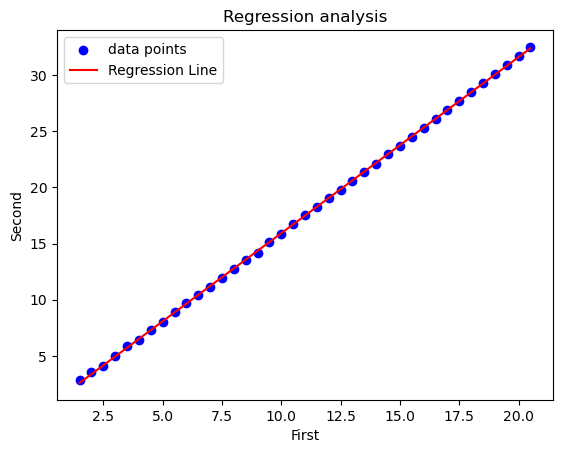

In [394]:
plt.scatter(X, Y, color = 'blue', label = 'data points')
plt.plot(X, y_hat, color = 'red', label = "Regression Line")
plt.xlabel('First')
plt.ylabel('Second')
plt.title("Regression analysis")
plt.legend()
plt.show()

In [382]:
# help(plt.plot)

## using statsmodels library

In [397]:
# pip install statsmodels 

In [399]:
import statsmodels.api as sm

In [403]:
X.head()

0    1.5
1    2.0
2    2.5
3    3.0
4    3.5
Name: First, dtype: float64

In [405]:
X = sm.add_constant(X)

In [409]:
X.tail()

,const,First
34,1.0,18.5
35,1.0,19.0
36,1.0,19.5
37,1.0,20.0
38,1.0,20.5


In [415]:
result = sm.OLS(Y, X).fit()

In [417]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Second   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.171e+05
Date:                Fri, 25 Apr 2025   Prob (F-statistic):           1.42e-76
Time:                        01:59:34   Log-Likelihood:                 41.694
No. Observations:                  39   AIC:                            -79.39
Df Residuals:                      37   BIC:                            -76.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2504      0.030      8.349      0.000       0.190       0.311
First          1.5674      0.002    645.839      0.000       1.563       1.572
==============================================================================
Omnibus:                        8.604   Durbin-Watson:                   0.792
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                7.487
Skew:                           0.893   Prob(JB):                       0.0237
Kurtosis:                       4.190   Cond. No.                         27.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## $\hat y = \beta_0 + \beta_1 X$

In [429]:
Y_HAT = result.predict(X)

Y_HAT.head()

0    2.601538
1    3.385263
2    4.168988
3    4.952713
4    5.736437
dtype: float64

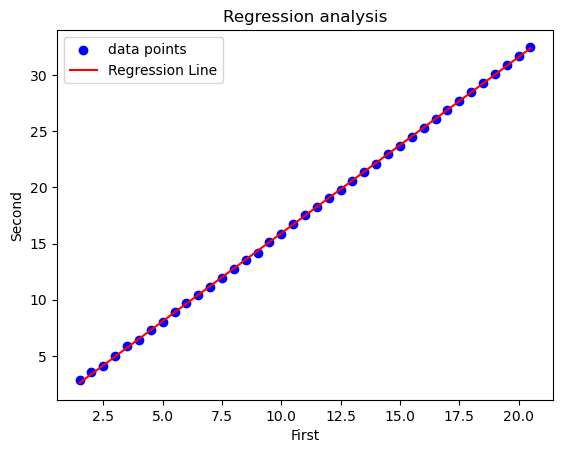

In [459]:
plt.scatter(data['First'], data['Second'], color = 'blue', label = 'data points')
plt.plot(data['First'], Y_HAT, color = 'red', label = "Regression Line")
plt.xlabel('First')
plt.ylabel('Second')
plt.title("Regression analysis")
plt.legend()
plt.show()

# Exercise

## Use the data from the second sheet of the Excel file (the one used for teaching in the first session). Perform an OLS regression using the statsmodels library, similar to the analysis from this session, and plot its scatter plot.